<a href="https://colab.research.google.com/github/hiid0726/DataAnalysis/blob/main/hiid0726/ch06_03_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%94%84%EB%A0%88%EC%9E%84_%EC%8B%AC%ED%99%94_ym.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터프레임의 합성

* `numpy` 배열을 합치는 것
  * `concatenate`, `vstack`(열 사이즈), `hstack`(행)
  * `dstack`(m x n), `stack`(m x n) ... 모양이 맞는 것들을 연결

> 1:1로 연결

|이름|전화번호|
|-|-|
|김제육|010-xxxx-xxxx|
|이김치|010-xxxx-xxxx|

|이름|주소|
|-|-|
|김제육|서울시 제육구|
|이김치|경기도 김치시|

↓

|이름|전화번호|주소|
|-|-|-|
|김제육|010-xxxx-xxxx|서울시 제육구|
|이김치|010-xxxx-xxxx|경기도 김치시|

`이름` : `공통 열`
행 라벨 -> 열, 이름. 행 인덱스
0~10....

> 1:M 로 연결

|이름|주소|
|-|-|
|A|서울시|
|B|경기도|
|C|서울시|
|D|울산시|

|주소|지원금|
|-|-|
|서울시|10000|
|경기도|11100|
|인천시|20000|

↓

|이름|주소|지원금|
|-|-|-|
|A|서울시|10000|
|B|경기도|11100|
|C|서울시|10000|

## `merge` (두 개 이상의 데이터프레임을 join, 연결)

In [ ]:
import pandas as pd;
import numpy as np;
df1 = pd.DataFrame({
    '고객번호': [1001, 1002, 1003, 1004, 1005, 1006, 1007],
    '이름': ['둘리', '도우너', '또치', '길동', '희동', '마이콜', '영희']
}, columns=['고객번호', '이름'])
df1 # 고객 목록

,고객번호,이름
0,1001,둘리
1,1002,도우너
2,1003,또치
3,1004,길동
4,1005,희동
5,1006,마이콜
6,1007,영희


In [ ]:
df2 = pd.DataFrame({
    '고객번호': [1001, 1001, 1005, 1006, 1008, 1001],
    '금액': [10000, 20000, 15000, 5000, 100000, 30000]
}, columns=['고객번호', '금액'])
df2 # 구매 기록

,고객번호,금액
0,1001,10000
1,1001,20000
2,1005,15000
3,1006,5000
4,1008,100000
5,1001,30000


In [ ]:
# merge : 결합하다 -> pandas.merge(df1, df2) # df1 (left), df2 (right)
pd.merge(df1,df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(left=df1,right=df2)

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(left=df2,right=df1)

,고객번호,금액,이름
0,1001,10000,둘리
1,1001,20000,둘리
2,1001,30000,둘리
3,1005,15000,희동
4,1006,5000,마이콜


In [ ]:
pd.merge(left=df1,right=df2, on='고객번호')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(left=df1,right=df2, on='고객번호', how='inner')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1001,둘리,30000
3,1005,희동,15000
4,1006,마이콜,5000


In [ ]:
pd.merge(left=df1,right=df2, on='고객번호', how='left')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN


In [ ]:
pd.merge(left=df1,right=df2, on='고객번호', how='right')

,고객번호,이름,금액
0,1001,둘리,10000
1,1001,둘리,20000
2,1005,희동,15000
3,1006,마이콜,5000
4,1008,NaN,100000
5,1001,둘리,30000


In [ ]:
pd.merge(left=df1,right=df2, on='고객번호', how='outer')

,고객번호,이름,금액
0,1001,둘리,10000.0
1,1001,둘리,20000.0
2,1001,둘리,30000.0
3,1002,도우너,NaN
4,1003,또치,NaN
5,1004,길동,NaN
6,1005,희동,15000.0
7,1006,마이콜,5000.0
8,1007,영희,NaN
9,1008,NaN,100000.0


In [ ]:
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df1

,품종,꽃잎길이
0,setosa,1.4
1,setosa,1.3
2,virginica,1.5
3,virginica,1.3


In [ ]:
df1.품종.value_counts()

setosa       2
virginica    2
Name: 품종, dtype: int64

In [ ]:
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df2

,품종,꽃잎너비
0,setosa,0.4
1,virginica,0.3
2,virginica,0.5
3,versicolor,0.3


In [ ]:
df2.품종.value_counts()

virginica     2
setosa        1
versicolor    1
Name: 품종, dtype: int64

In [ ]:
pd.merge(df1,df2)
#1. 공통으로 존재하는 컬럼을 찾는다.
#2. 품종들이 몇개씩 있는지 확인 -> 같은 열에 동일한 원소가 여러 개
# -> 원소들끼리 모든경우의 수 (조합)을 만들어냄
# inner(df1,df2)가 모두 존재하는걸로만 연결되었다.

,품종,꽃잎길이,꽃잎너비
0,setosa,1.4,0.4
1,setosa,1.3,0.4
2,virginica,1.5,0.3
3,virginica,1.5,0.5
4,virginica,1.3,0.3
5,virginica,1.3,0.5


### 연결되면 안되는 열의 이름이 같을 때

In [ ]:
# 두 df에서 이름이 같은 열은 모두 연결하는 기준 (키=on)
# 이름은 같아도 키가 되면 안되는 열 => `on` 무엇을 기준을 할지 명시
# (학생) 수업ID / 이름 (학생의 이름)
# (수업) 수업ID / 이름 (수업의 이름)
# -> on=[수업ID, 이름] ??? -> on='수업ID'
df1 = pd.DataFrame({
    '고객명': ['춘향', '춘향', '몽룡'],
    '날짜': ['2018-01-01', '2018-01-02', '2018-01-01'],
    '데이터': ['20000', '30000', '100000']})
df1

,고객명,날짜,데이터
0,춘향,2018-01-01,20000
1,춘향,2018-01-02,30000
2,몽룡,2018-01-01,100000


In [ ]:
df2 = pd.DataFrame({
    '고객명': ['춘향', '몽룡'],
    '데이터': ['여자', '남자']})
df2

,고객명,데이터
0,춘향,여자
1,몽룡,남자


,고객명,날짜,데이터


In [ ]:
# pd.merge(df1, df2, on="고객명", suffixes["_A","_B"])
pd.merge(df1, df2, on='고객명', suffixes=["_A", "_B"])

,고객명,날짜,데이터_A,데이터_B
0,춘향,2018-01-01,20000,여자
1,춘향,2018-01-02,30000,여자
2,몽룡,2018-01-01,100000,남자


### 연결하는 기준이 되는 열들의 이름이 다를 때

In [ ]:
df1 = pd.DataFrame({
    '이름': ['영희', '철수', '철수'],
    '성적': [1, 2, 3]})
df1

,이름,성적
0,영희,1
1,철수,2
2,철수,3


In [ ]:
df2 = pd.DataFrame({
    '성명': ['영희', '영희', '철수'],
    '성적2': [4, 5, 6]})
df2 # df2['이름'] = df2['성명'], df2.drop...['성명']??, rename...

,성명,성적2
0,영희,4
1,영희,5
2,철수,6


In [ ]:
pd.merge(df1,df2)

MergeError: ignored

In [ ]:
# pd.merge(df1, df2, left_on='이름', right_on='성명')
pd.merge(df1, df2, left_on='이름', right_on='성명')

,이름,성적,성명,성적2
0,영희,1,영희,4
1,영희,1,영희,5
2,철수,2,철수,6
3,철수,3,철수,6


### 인덱스를 기준으로 합쳐주고 싶을 때

In [ ]:
df1 = pd.DataFrame({
    '도시': ['서울', '서울', '서울', '부산', '부산'],
    '연도': [2000, 2005, 2010, 2000, 2005],
    '인구': [9853972, 9762546, 9631482, 3655437, 3512547]})
df1

,도시,연도,인구
0,서울,2000,9853972
1,서울,2005,9762546
2,서울,2010,9631482
3,부산,2000,3655437
4,부산,2005,3512547


In [ ]:
df2 = pd.DataFrame(
    np.arange(12).reshape((6, 2)),
    index=[['부산', '부산', '서울', '서울', '서울', '서울'],
           [2000, 2005, 2000, 2005, 2010, 2015]],
    columns=['데이터1', '데이터2'])
df2

데이터1  데이터2
부산 2000     0     1
   2005     2     3
서울 2000     4     5
   2005     6     7
   2010     8     9
   2015    10    11

In [ ]:
pd.merge(df1,df2, left_on = ['도시','연도'], right_index=True) #rigth는 인덱스를 사용하겠다 명시

,도시,연도,인구,데이터1,데이터2
0,서울,2000,9853972,4,5
1,서울,2005,9762546,6,7
2,서울,2010,9631482,8,9
3,부산,2000,3655437,0,1
4,부산,2005,3512547,2,3


In [ ]:
df2.reset_index()

,level_0,level_1,데이터1,데이터2
0,부산,2000,0,1
1,부산,2005,2,3
2,서울,2000,4,5
3,서울,2005,6,7
4,서울,2010,8,9
5,서울,2015,10,11


In [ ]:
pd.merge(df1, df2.reset_index(), left_on=['도시','연도'], right_on=['level_0','level_1'])

,도시,연도,인구,level_0,level_1,데이터1,데이터2
0,서울,2000,9853972,서울,2000,4,5
1,서울,2005,9762546,서울,2005,6,7
2,서울,2010,9631482,서울,2010,8,9
3,부산,2000,3655437,부산,2000,0,1
4,부산,2005,3512547,부산,2005,2,3


### `join`을 통한 합성

In [ ]:
# pd.merge(left, right, ...) # on? index?... how?
# df1 -> left
df1 = pd.DataFrame({
    '품종': ['setosa', 'setosa', 'virginica', 'virginica'],
    '꽃잎길이': [1.4, 1.3, 1.5, 1.3]},
    columns=['품종', '꽃잎길이'])
df2 = pd.DataFrame({
    '품종': ['setosa', 'virginica', 'virginica', 'versicolor'],
    '꽃잎너비': [0.4, 0.3, 0.5, 0.3]},
    columns=['품종', '꽃잎너비'])
df1, df2

(          품종  꽃잎길이
 0     setosa   1.4
 1     setosa   1.3
 2  virginica   1.5
 3  virginica   1.3,            품종  꽃잎너비
 0      setosa   0.4
 1   virginica   0.3
 2   virginica   0.5
 3  versicolor   0.3)

In [ ]:
df1.join(df2)

ValueError: ignored

In [ ]:
# join은 두개의 df를 인덱스 기준으로 합쳐주는 메소드
df1.join(df2, lsuffix='l',rsuffix='r') # join = index 기준으로 합쳐버림

,품종l,꽃잎길이,품종r,꽃잎너비
0,setosa,1.4,setosa,0.4
1,setosa,1.3,virginica,0.3
2,virginica,1.5,virginica,0.5
3,virginica,1.3,versicolor,0.3


In [ ]:
df1.set_index('품종').join(df2.set_index('품종'))

,꽃잎길이,꽃잎너비
품종,,
setosa,1.4,0.4
setosa,1.3,0.4
virginica,1.5,0.3
virginica,1.5,0.5
virginica,1.3,0.3
virginica,1.3,0.5


### `merge`
- 두 데이터프레임 사이의 크기가 같을 필요가 없음 (기준이 되는 열, 인덱스를 바탕으로 outer, inner... 내용들을 재구성
- `on` ... -> 어떠한 열을 기준으로 해줄까? `index`...
- 두 개의 데이터가 공통 분모만 있다면 (키) 연결
- 열 기준으로 연결할 필요가 없다? `join` -> 인덱스를 기준

## `concat`
* `merge` : 특정한 열을 기준(또는 인덱스)으로 해서 연결
* `concat` : 기준 열을 사용하지 않고 데이터를 연결(붙임) - np.concatenate, vstack, hstack...

In [ ]:
s1 = pd.Series([0, 1], index=['A', 'B'])
s2 = pd.Series([2, 3, 4], index=['A', 'B', 'C'])

In [ ]:
s1

A    0
B    1
dtype: int64

In [ ]:
s2

A    2
B    3
C    4
dtype: int64

In [ ]:
# pd.concat
pd.concat([s1,s2]) #axis = 0 기본값

A    0
B    1
A    2
B    3
C    4
dtype: int64

In [ ]:
pd.concat([s1,s2],axis = 1)

,0,1
A,0.0,2
B,1.0,3
C,NaN,4


# 피봇테이블과 그룹 분석

## 피봇테이블
* Pivot Table : 데이터 열 중에서 두 개의 열을 각각 행과 열 인덱스로 사용해서 데이터를 조회해 놓은 것
* 엑셀 -> 피봇테이블
* Pandas -> 피봇테이블 `pivot` (행 인덱스로 사용할 열이름, 열 인덱스로 사용할 열 이름)

In [1]:
import pandas as pd;
import numpy as np;
data = {
    "도시": ["서울", "서울", "서울", "부산", "부산", "부산", "인천", "인천"],
    "연도": ["2015", "2010", "2005", "2015", "2010", "2005", "2015", "2010"],
    "인구": [9904312, 9631482, 9762546, 3448737, 3393191, 3512547, 2890451, 263203],
    "지역": ["수도권", "수도권", "수도권", "경상권", "경상권", "경상권", "수도권", "수도권"]
}
columns = ["도시", "연도", "인구", "지역"]

In [2]:
df1 = pd.DataFrame(data, columns=columns)
df1

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [5]:
# 행 인덱스, 열 인덱스, 묶어줄 데이터 
df1.pivot('도시','연도','인구')

연도,2005,2010,2015
도시,,,
부산,3512547.0,3393191.0,3448737.0
서울,9762546.0,9631482.0,9904312.0
인천,NaN,263203.0,2890451.0


In [9]:
df1.pivot('지역','연도','인구') #행에 들어오는 데이터(지역)가 두개 이상으로 갈라질 경우 피벗 불가

ValueError: ignored

In [8]:
df1.pivot(['지역','도시'],'연도','인구') # 이렇게하면 됨

연도           2005       2010       2015
지역  도시                                 
경상권 부산  3512547.0  3393191.0  3448737.0
수도권 서울  9762546.0  9631482.0  9904312.0
    인천        NaN   263203.0  2890451.0

In [12]:
df1.set_index(['도시','연도'])[['인구']].unstack()

인구                      
연도       2005       2010       2015
도시                                 
부산  3512547.0  3393191.0  3448737.0
서울  9762546.0  9631482.0  9904312.0
인천        NaN   263203.0  2890451.0

## 그룹분석
* 조건에 맞는 데이터가 하나 이상일 경우에 -> 데이터 그룹을 이룸 (피봇 테이블 형태로 표현을 X)
* 그룹의 특성을 보여주는 (통계치, 계산...) => 그룹 분석 (group analysis)
* group -> `groupby`

1. 분석하고자 하는 Series, df에 `groupby` 메소드 호출 -> 그룹화
1. 그룹화 -> 그룹 객체 -> 그룹 연산

### groupby 메소드
* 데이터를 그룹별로 분류하는 역할.
    * 열 또는 열의 리스트 (어떤 열을 기준으로 그룹을 넣어줄 것이냐
    * 행 인덱스
=> GroupBy (그룹화) => 그룹 함수 or 그룹 연산 => 특정한 값. 배열...

In [13]:
np.random.seed(0)
df2 = pd.DataFrame({
    'key1': ['A', 'A', 'B', 'B', 'A'],
    'key2': ['one', 'two', 'one', 'two', 'one'],
    'data1': [1, 2, 3, 4, 5],
    'data2': [10, 20, 30, 40, 50]
})
df2

,key1,key2,data1,data2
0,A,one,1,10
1,A,two,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   key1    5 non-null      object
 1   key2    5 non-null      object
 2   data1   5 non-null      int64 
 3   data2   5 non-null      int64 
dtypes: int64(2), object(2)
memory usage: 288.0+ bytes


In [15]:
groups = df2.groupby(df2.key1)
groups

In [16]:
# groupby.groups(속성) : 그룹별 구성 현황
groups.groups # 행 인덱스를 가지고있다...

{'A': [0, 1, 4], 'B': [2, 3]}

In [17]:
groups.count()

,key2,data1,data2
key1,,,
A,3,3,3
B,2,2,2


In [20]:
df3 = df2.copy()
df3.iloc[1,1] = np.nan
df3

,key1,key2,data1,data2
0,A,one,1,10
1,A,NaN,2,20
2,B,one,3,30
3,B,two,4,40
4,A,one,5,50


In [21]:
groups.size() # 행의 갯수

key1
A    3
B    2
dtype: int64

In [22]:
# 평균
groups.mean()

,data1,data2
key1,,
A,2.666667,26.666667
B,3.500000,35.000000


In [23]:
# 중앙값 (median)
groups.median()

,data1,data2
key1,,
A,2.0,20.0
B,3.5,35.0


In [24]:
# 최대값
groups.max()

,key2,data1,data2
key1,,,
A,two,5,50
B,two,4,40


In [25]:
# 최소값
groups.min()

,key2,data1,data2
key1,,,
A,one,1,10
B,one,3,30


In [26]:
# 합계
groups.sum()

,data1,data2
key1,,
A,8,80
B,7,70


In [27]:
# 일괄적으로 곱함
groups.prod()

,data1,data2
key1,,
A,10,10000
B,12,1200


In [29]:
# 표준편차, 분산, 중간값(50%)
groups.std()

,data1,data2
key1,,
A,2.081666,20.816660
B,0.707107,7.071068


In [30]:
groups.var()

,data1,data2
key1,,
A,4.333333,433.333333
B,0.500000,50.000000


In [31]:
groups.quantile(0.5)

<ipython-input-31-df97294cd3b1>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.5)


,data1,data2
key1,,
A,2.0,20.0
B,3.5,35.0


In [32]:
groups.quantile(0.25)

<ipython-input-32-de6ad5660f10>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.25)


,data1,data2
key1,,
A,1.50,15.0
B,3.25,32.5


In [33]:
groups.quantile(0.75)

<ipython-input-33-03a439ba554f>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.75)


,data1,data2
key1,,
A,3.50,35.0
B,3.75,37.5


In [34]:
groups.describe()

data1                                                data2             \
     count      mean       std  min   25%  50%   75%  max count       mean   
key1                                                                         
A      3.0  2.666667  2.081666  1.0  1.50  2.0  3.50  5.0   3.0  26.666667   
B      2.0  3.500000  0.707107  3.0  3.25  3.5  3.75  4.0   2.0  35.000000   

                                               
            std   min   25%   50%   75%   max  
key1                                           
A     20.816660  10.0  15.0  20.0  35.0  50.0  
B      7.071068  30.0  32.5  35.0  37.5  40.0

<ipython-input-161-76352a3dad86>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.25), groups.quantile(0.75) # 1분위 (25/100... 50/100... 75/100...)


(      data1  data2
 key1              
 A      1.50   15.0
 B      3.25   32.5,       data1  data2
 key1              
 A      3.50   35.0
 B      3.75   37.5)

In [35]:
# 특정한 열만 뽑아주고 싶다
groups.quantile(0.5).data1

<ipython-input-35-8ab026a6ea9b>:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.5).data1


key1
A    2.0
B    3.5
Name: data1, dtype: float64

In [37]:
groups.quantile(0.5)['data1']

<ipython-input-37-cc446c034000>:1: FutureWarning: Dropping invalid columns in DataFrameGroupBy.quantile is deprecated. In a future version, a TypeError will be raised. Before calling .quantile, select only columns which should be valid for the function.
  groups.quantile(0.5)['data1']


key1
A    2.0
B    3.5
Name: data1, dtype: float64

### 복합키

In [42]:
df1.groupby('도시')['인구'].sum()

도시
부산    10354475
서울    29298340
인천     3153654
Name: 인구, dtype: int64

In [43]:
df1.groupby('지역')['인구'].sum()

지역
경상권    10354475
수도권    32451994
Name: 인구, dtype: int64

In [46]:
df1.groupby(['지역','도시'])[['인구']].sum()

인구
지역  도시          
경상권 부산  10354475
수도권 서울  29298340
    인천   3153654

In [49]:
# unstack --> 인덱스 중에 하나를 정해서, 해당 인덱스를 열로 다시 배치
df2.data1.groupby([df2.key1,df2.key2]).sum().unstack()

key2,one,two
key1,,
A,6,2
B,3,4


In [ ]:
#위에서햇음

,도시,연도,인구,지역
0,서울,2015,9904312,수도권
1,서울,2010,9631482,수도권
2,서울,2005,9762546,수도권
3,부산,2015,3448737,경상권
4,부산,2010,3393191,경상권
5,부산,2005,3512547,경상권
6,인천,2015,2890451,수도권
7,인천,2010,263203,수도권


In [ ]:
#위에서햇음

,인구
지역,
경상권,10354475
수도권,32451994


In [52]:
# 2개 이상의 키를 사용해주려면 [] 담아야함
df1.groupby([df1.지역,df1.연도]).sum().unstack('연도')

인구                   
연도      2005     2010      2015
지역                             
경상권  3512547  3393191   3448737
수도권  9762546  9894685  12794763

### agg (aggregate)

In [54]:
import seaborn as sns # 예시 데이터들을 불러올 수 있음
iris = sns.load_dataset('iris') # 붓꽃
iris # 붓꽃의 데이터

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [55]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [56]:
iris.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [57]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [58]:
iris.describe(include='all')

,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [60]:
# 각 붓꽃의 종별로 (열별로) 가장 큰 값과 가장 작은 값의 비율을 구해보기
iris.groupby(iris.species).agg(lambda x: x.max() / x.min())

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [61]:
def peak_to_peak_ratio(x):
  return x.max() / x.min() 

In [62]:
iris.groupby(iris.species).agg(peak_to_peak_ratio)

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,1.348837,1.913043,1.900000,6.000000
versicolor,1.428571,1.700000,1.700000,1.800000
virginica,1.612245,1.727273,1.533333,1.785714


In [63]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

* `agg` : 그룹 들의 대표값
* `apply` : 그룹들로 나뉘어진 행에 대해서 반복적 연산

In [68]:
#꽃잎의 길이가 가장 긴 상위 3개 뽑기
def top3_petal_length(df):
  return df.sort_values(by='petal_length', ascending=False)[:3]

iris.groupby(iris.species).apply(top3_petal_length)

sepal_length  sepal_width  petal_length  petal_width  \
species                                                                
setosa     24            4.8          3.4           1.9          0.2   
           44            5.1          3.8           1.9          0.4   
           23            5.1          3.3           1.7          0.5   
versicolor 83            6.0          2.7           5.1          1.6   
           77            6.7          3.0           5.0          1.7   
           72            6.3          2.5           4.9          1.5   
virginica  118           7.7          2.6           6.9          2.3   
           117           7.7          3.8           6.7          2.2   
           122           7.7          2.8           6.7          2.0   

                   species  
species                     
setosa     24       setosa  
           44       setosa  
           23       setosa  
versicolor 83   versicolor  
           77   versicolor  
           72   versicolor  
virginica  118   virginica  
           117   virginica  
           122   virginica

# 시계열 자료 다루기
* 인덱스가 시간 또는 날짜인 데이터 -> 순서가 시간/날짜 데이터에 따라 정해져있음
* 시계열 데이터의 인덱스 `DatetimeIndex`
```
2022-12-09 <- 텍스트 형태로 인덱스가 제공. => `DatetimeIndex`
```
* 꼭 일정 기간에 꽉차져있는 형태로 인덱스가 X (날짜 형식만 지키면 됨)
---
* `pd.to_datetime`
* `pd.date_range`

In [70]:
# pd.to_datetime => (시간, 날짜 형태로 표현된 데이터들의 나열된 리스트...) => DatetimeIndex
date_str = ['2023. 1. 1', '2023. 4. 1', '2023. 1. 6']
idx = pd.to_datetime(date_str)
idx


DatetimeIndex(['2023-01-01', '2023-04-01', '2023-01-06'], dtype='datetime64[ns]', freq=None)

In [72]:
s = pd.Series(np.random.rand(len(idx)), index = idx)
s

2023-01-01    0.544883
2023-04-01    0.423655
2023-01-06    0.645894
dtype: float64

In [74]:
# pd.date_range : range, arange처럼 시작일/종료일 또는 시작일/기간을 입력하면 범위 내의 시간/날짜 인덱스를 생성
# 1. 시작일과 종료일
pd.date_range('2023-4-1', '2023-4-30',freq='D') #freq:빈도... D = day, Y = year, M = month

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')

In [76]:
# 2. 시작일과 기간
pd.date_range('2023-4-1', periods=30) #periods 기간 주기. 30일..

DatetimeIndex(['2023-04-01', '2023-04-02', '2023-04-03', '2023-04-04',
               '2023-04-05', '2023-04-06', '2023-04-07', '2023-04-08',
               '2023-04-09', '2023-04-10', '2023-04-11', '2023-04-12',
               '2023-04-13', '2023-04-14', '2023-04-15', '2023-04-16',
               '2023-04-17', '2023-04-18', '2023-04-19', '2023-04-20',
               '2023-04-21', '2023-04-22', '2023-04-23', '2023-04-24',
               '2023-04-25', '2023-04-26', '2023-04-27', '2023-04-28',
               '2023-04-29', '2023-04-30'],
              dtype='datetime64[ns]', freq='D')

In [77]:
pd.date_range('2023-4-1', '2023-4-30',freq='M') #M으로 했을때 끝이 나옴. 그럼 시작일을 나오게하려면?

DatetimeIndex(['2023-04-30'], dtype='datetime64[ns]', freq='M')

In [79]:
pd.date_range('2023-4-1', '2023-4-30',freq='MS') #MS로 하면 시작일을 기준으로 나온다.

DatetimeIndex(['2023-04-01'], dtype='datetime64[ns]', freq='MS')

## `shift`

In [80]:
!pip install yfinance -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 KB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.8/112.8 KB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 48.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 18.0 MB/s eta 0:00:00


In [84]:
import yfinance as yf

tqqq = yf.Ticker('TQQQ').history()
tqqq

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2023-02-14 00:00:00-05:00,24.540001,25.740000,24.049999,25.490000,255737200,0.0,0.0,0.0
2023-02-15 00:00:00-05:00,25.020000,26.100000,24.850000,26.059999,137763700,0.0,0.0,0.0
2023-02-16 00:00:00-05:00,24.830000,25.870001,24.530001,24.570000,194496500,0.0,0.0,0.0
2023-02-17 00:00:00-05:00,24.030001,24.230000,23.299999,24.040001,194902400,0.0,0.0,0.0
2023-02-21 00:00:00-05:00,23.100000,23.450001,22.290001,22.350000,150468800,0.0,0.0,0.0
2023-02-22 00:00:00-05:00,22.450001,22.850000,21.980000,22.370001,167338700,0.0,0.0,0.0
2023-02-23 00:00:00-05:00,23.190001,23.230000,21.950001,22.930000,179770000,0.0,0.0,0.0
2023-02-24 00:00:00-05:00,21.750000,22.030001,21.350000,21.770000,172781800,0.0,0.0,0.0
2023-02-27 00:00:00-05:00,22.480000,22.799999,22.100000,22.240000,138754400,0.0,0.0,0.0


In [88]:
df = tqqq[['Close']]
df

,Close
Date,
2023-02-14 00:00:00-05:00,25.490000
2023-02-15 00:00:00-05:00,26.059999
2023-02-16 00:00:00-05:00,24.570000
2023-02-17 00:00:00-05:00,24.040001
2023-02-21 00:00:00-05:00,22.350000
2023-02-22 00:00:00-05:00,22.370001
2023-02-23 00:00:00-05:00,22.930000
2023-02-24 00:00:00-05:00,21.770000
2023-02-27 00:00:00-05:00,22.240000


In [90]:
df.shift() #데이터 아래로 하나씩 내리기
df.shift(-1) #데이터 위로 하나씩 올리기

,Close
Date,
2023-02-14 00:00:00-05:00,26.059999
2023-02-15 00:00:00-05:00,24.570000
2023-02-16 00:00:00-05:00,24.040001
2023-02-17 00:00:00-05:00,22.350000
2023-02-21 00:00:00-05:00,22.370001
2023-02-22 00:00:00-05:00,22.930000
2023-02-23 00:00:00-05:00,21.770000
2023-02-24 00:00:00-05:00,22.240000
2023-02-27 00:00:00-05:00,22.129999


In [96]:
# 시계열의 데이터의 인덱스는 '시간'(순서) => 날짜 이동 => 전날/오늘 데이터 비교, 연산...
# 날짜/시간 -> DatetimeIndex => 인덱스는 그대로 두고 데이터만 이동
(df - df.shift(1)) / df.shift(1) *100 #오늘 값 - 어제 값  ## 변동률,,,

,Close
2023-02-14,NaN
2023-02-15,2.236170
2023-02-16,-5.717574
2023-02-17,-2.157097
2023-02-21,-7.029952
2023-02-22,0.089488
2023-02-23,2.503350
2023-02-24,-5.058874
2023-02-27,2.158931
2023-02-28,-0.494607


In [95]:
df.index = df.index.date

2018-01-31   -0.289544
2018-02-28   -1.116066
2018-03-31   -0.012883
2018-04-30         NaN
Freq: M, dtype: float64

2018-02-28    0.001109
2018-03-31   -0.289544
2018-04-30   -1.116066
2018-05-31   -0.012883
Freq: M, dtype: float64

2018-02-01    0.001109
2018-03-01   -0.289544
2018-04-01   -1.116066
2018-05-01   -0.012883
dtype: float64

### `resample` 연산
* 시간 간격을 재조정
* 시간 구간을 작게 만든다 -> 데이터 양이 증가 -> 업-샘플링(up-sampling)
* 시간 구간을 크게 만든다 -> 데이터 양이 감소 -> 다운-샘플링(down-sampling)

In [98]:
!pip install pyupbit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 KB 5.1 MB/s eta 0:00:00


In [99]:
import pyupbit as py;

In [100]:
py.get_tickers()

['KRW-BTC',
 'KRW-ETH',
 'BTC-ETH',
 'BTC-XRP',
 'BTC-ETC',
 'BTC-OMG',
 'BTC-CVC',
 'BTC-DGB',
 'BTC-SC',
 'BTC-SNT',
 'BTC-WAVES',
 'BTC-NMR',
 'BTC-XEM',
 'BTC-QTUM',
 'BTC-BAT',
 'BTC-LSK',
 'BTC-STEEM',
 'BTC-DOGE',
 'BTC-BNT',
 'BTC-XLM',
 'BTC-ARDR',
 'BTC-ARK',
 'BTC-STORJ',
 'BTC-GRS',
 'BTC-REP',
 'BTC-RLC',
 'USDT-BTC',
 'USDT-ETH',
 'USDT-XRP',
 'USDT-ETC',
 'KRW-NEO',
 'KRW-MTL',
 'KRW-XRP',
 'KRW-ETC',
 'KRW-OMG',
 'KRW-SNT',
 'KRW-WAVES',
 'KRW-XEM',
 'KRW-QTUM',
 'KRW-LSK',
 'KRW-STEEM',
 'KRW-XLM',
 'KRW-ARDR',
 'KRW-ARK',
 'KRW-STORJ',
 'KRW-GRS',
 'KRW-REP',
 'KRW-ADA',
 'BTC-ADA',
 'BTC-MANA',
 'USDT-OMG',
 'KRW-SBD',
 'BTC-SBD',
 'KRW-POWR',
 'BTC-POWR',
 'KRW-BTG',
 'USDT-ADA',
 'BTC-DNT',
 'BTC-ZRX',
 'BTC-TRX',
 'BTC-TUSD',
 'BTC-LRC',
 'KRW-ICX',
 'KRW-EOS',
 'USDT-TUSD',
 'KRW-TRX',
 'BTC-POLYX',
 'USDT-SC',
 'USDT-TRX',
 'KRW-SC',
 'KRW-ONT',
 'KRW-ZIL',
 'KRW-POLYX',
 'KRW-ZRX',
 'KRW-LOOM',
 'BTC-BCH',
 'USDT-BCH',
 'KRW-BCH',
 'BTC-HIFI',
 'BTC-LOOM',
 'KR

In [107]:
eth = py.get_ohlcv("KRW-ETH")
eth

,open,high,low,close,volume,value
2022-08-27 09:00:00,2086000.0,2102000.0,2010000.0,2063000.0,65272.840858,1.346476e+11
2022-08-28 09:00:00,2063000.0,2090000.0,1975000.0,1979500.0,42888.047388,8.746746e+10
2022-08-29 09:00:00,1978000.0,2138000.0,1970500.0,2127000.0,74358.776692,1.523151e+11
2022-08-30 09:00:00,2126000.0,2203000.0,2047000.0,2103000.0,94895.856511,2.025001e+11
2022-08-31 09:00:00,2101000.0,2209000.0,2100000.0,2136000.0,89723.275812,1.941040e+11
...,...,...,...,...,...,...
2023-03-10 09:00:00,1948500.0,1949000.0,1870000.0,1936000.0,36619.652557,6.997561e+10
2023-03-11 09:00:00,1937000.0,1999500.0,1914500.0,1993500.0,33283.890899,6.527923e+10
2023-03-12 09:00:00,1992000.0,2109000.0,1947500.0,2098000.0,31187.493259,6.296181e+10
2023-03-13 09:00:00,2096000.0,2218000.0,2070000.0,2200000.0,56367.309004,1.210064e+11


In [110]:
pd.options.display.float_format = '{:2f}'.format

In [111]:
# 다운-샘플링 -> 시간을 더 크게 묶는 거 -> "D(Day)" => "Week?"
eth.resample('W').mean()

,open,high,low,close,volume,value
2022-08-28,2074500.000000,2096000.000000,1992500.000000,2021250.000000,54080.444123,111057530171.320892
2022-09-04,2120857.142857,2196571.428571,2089500.000000,2148857.142857,71225.353504,152710639278.627533
2022-09-11,2269000.000000,2342857.142857,2233428.571429,2303000.000000,69019.441334,156572145547.152985
2022-09-18,2205428.571429,2245285.714286,2088357.142857,2131928.571429,88247.159697,192262318233.005829
2022-09-25,1883428.571429,1943285.714286,1823071.428571,1879285.714286,64938.817108,121817073668.567474
2022-10-02,1904571.428571,1942357.142857,1864285.714286,1904357.142857,45323.345555,86591211118.211380
2022-10-09,1903785.714286,1929357.142857,1881714.285714,1908285.714286,26029.394520,49822485783.379982
2022-10-16,1854285.714286,1885142.857143,1820428.571429,1853571.428571,26851.001417,49532247531.242455
2022-10-23,1876000.000000,1906142.857143,1852714.285714,1887071.428571,20580.962550,38735623075.150108
2022-10-30,2104000.000000,2196571.428571,2073285.714286,2144500.000000,50755.586210,109031713724.275726


In [112]:
eth.resample('W').max()

,open,high,low,close,volume,value
2022-08-28,2086000.000000,2102000.000000,2010000.000000,2063000.000000,65272.840858,134647599812.407257
2022-09-04,2176000.000000,2260000.000000,2145000.000000,2176000.000000,97587.305001,214881159136.774567
2022-09-11,2414000.000000,2431000.000000,2373000.000000,2416000.000000,121839.906241,275595198519.542786
2022-09-18,2407000.000000,2427000.000000,2320000.000000,2346000.000000,176152.227082,392510831420.481628
2022-09-25,1941000.000000,1977000.000000,1880000.000000,1940500.000000,94088.494720,177102460467.970398
2022-10-02,1923000.000000,1995000.000000,1892500.000000,1924000.000000,73822.002641,143903948620.721344
2022-10-09,1941000.000000,1956500.000000,1916000.000000,1940000.000000,34152.035506,66136307307.325699
2022-10-16,1884000.000000,1922000.000000,1848000.000000,1875000.000000,62168.072477,111894571191.978012
2022-10-23,1904500.000000,1959500.000000,1875000.000000,1951500.000000,26722.470341,50665057052.741211
2022-10-30,2263000.000000,2310000.000000,2218000.000000,2265000.000000,79074.257101,170828301446.356750


In [115]:
# .first / .last : 맨 앞과 맨 마지막
eth.resample('MS').first()

,open,high,low,close,volume,value
2022-08-01,2086000.000000,2102000.000000,2010000.000000,2063000.000000,65272.840858,134647599812.407257
2022-09-01,2136000.000000,2193000.000000,2098000.000000,2175000.000000,76365.258780,163585697814.198334
2022-10-01,1909000.000000,1920000.000000,1884500.000000,1896500.000000,16267.927684,31001648371.883755
2022-11-01,2207000.000000,2250000.000000,2200000.000000,2218000.000000,26295.823637,58476358599.086937
2022-12-01,1752500.000000,1754500.000000,1710000.000000,1729000.000000,29415.605675,50990524695.347603
2023-01-01,1524000.000000,1535500.000000,1519000.000000,1528000.000000,6939.249786,10585761629.683069
2023-02-01,1992500.000000,2060000.000000,1957500.000000,2048000.000000,32184.490441,64638302315.183380
2023-03-01,2153000.000000,2200000.000000,2135000.000000,2194000.000000,17948.881441,39110134338.093857


In [114]:
eth.resample('M').last()

,open,high,low,close,volume,value
2022-08-31,2101000.000000,2209000.000000,2100000.000000,2136000.000000,89723.275812,194103998395.423615
2022-09-30,1910000.000000,1964000.000000,1892500.000000,1911000.000000,43457.254211,83458740837.148407
2022-10-31,2234000.000000,2291000.000000,2184000.000000,2208000.000000,38155.119935,85097269275.840973
2022-11-30,1657000.000000,1766500.000000,1655000.000000,1752500.000000,50982.607639,87964238429.107224
2022-12-31,1524000.000000,1537000.000000,1514000.000000,1525000.000000,10909.811781,16629168260.794081
2023-01-31,1969500.000000,2011000.000000,1952000.000000,1992500.000000,21724.126658,43002844038.773697
2023-02-28,2175000.000000,2188000.000000,2145000.000000,2150000.000000,15149.458033,32821483880.050732
2023-03-31,2200000.000000,2229000.000000,2191000.000000,2205000.000000,11682.279490,25797246442.514820


3.8268570179084005

2022-01-01 00:00:00    5.007377
2022-01-01 00:10:00    6.345329
2022-01-01 00:20:00    4.570907
2022-01-01 00:30:00    6.080002
2022-01-01 00:40:00    4.167549
2022-01-01 00:50:00    3.826857
Freq: 10T, dtype: float64

2022-01-01 00:00:00    0.009359
2022-01-01 00:01:00    0.499058
2022-01-01 00:02:00    0.113384
2022-01-01 00:03:00    0.049974
2022-01-01 00:04:00    0.685408
Freq: T, dtype: float64

2021-12-31 23:50:00    0.009359
2022-01-01 00:00:00    5.829372
2022-01-01 00:10:00    6.258182
2022-01-01 00:20:00    4.391373
2022-01-01 00:30:00    5.596715
2022-01-01 00:40:00    4.124552
2022-01-01 00:50:00    3.788468
Freq: 10T, dtype: float64

,open,high,low,close
2022-01-01 00:00:00,0.009359,0.685408,0.009359,0.685408
2022-01-01 00:05:00,0.486988,0.897657,0.486988,0.721135
2022-01-01 00:10:00,0.831353,0.957044,0.368044,0.368044
2022-01-01 00:15:00,0.494838,0.977530,0.096433,0.096433
2022-01-01 00:20:00,0.744206,0.752473,0.018664,0.018664
2022-01-01 00:25:00,0.523737,0.864436,0.212192,0.475181
2022-01-01 00:30:00,0.564672,0.975909,0.037820,0.794270
2022-01-01 00:35:00,0.357883,0.964883,0.357883,0.964883
2022-01-01 00:40:00,0.081386,0.490255,0.042451,0.490255
2022-01-01 00:45:00,0.668519,0.898331,0.080592,0.898331


### Down-sampling
* 1분 -> 10분 묶음 (데이터의 전체 수는 줄이고, 데이터 간의 구간은 늘리는 리샘플링) => 다운-샘플링 => 묶인 데이터들간의 '대표값' => 그룹함수, 집계함수 ==> (대표값)

## Up-sampling
* `ffill` : 앞전 시간대의 값을 불러와줌 (forward)
* `bfill` : 뒤 시간대의 값을 채워줌 (backward)

In [117]:
# up-sampling (10분 -> 1분짜리 쪼갬) => 없던거를 만드는 거
# f-fill (front) => 비었을 때 앞전 시간대에 존재하는 데이터로 채워줌

eth.index = eth.index.date
eth

,open,high,low,close,volume,value
2022-08-27,2086000.000000,2102000.000000,2010000.000000,2063000.000000,65272.840858,134647599812.407257
2022-08-28,2063000.000000,2090000.000000,1975000.000000,1979500.000000,42888.047388,87467460530.234512
2022-08-29,1978000.000000,2138000.000000,1970500.000000,2127000.000000,74358.776692,152315066121.405731
2022-08-30,2126000.000000,2203000.000000,2047000.000000,2103000.000000,94895.856511,202500054228.693329
2022-08-31,2101000.000000,2209000.000000,2100000.000000,2136000.000000,89723.275812,194103998395.423615
...,...,...,...,...,...,...
2023-03-10,1948500.000000,1949000.000000,1870000.000000,1936000.000000,36619.652557,69975611209.019073
2023-03-11,1937000.000000,1999500.000000,1914500.000000,1993500.000000,33283.890899,65279230587.726791
2023-03-12,1992000.000000,2109000.000000,1947500.000000,2098000.000000,31187.493259,62961809265.791573
2023-03-13,2096000.000000,2218000.000000,2070000.000000,2200000.000000,56367.309004,121006386299.596985


In [118]:
eth.head()

,open,high,low,close,volume,value
2022-08-27,2086000.000000,2102000.000000,2010000.000000,2063000.000000,65272.840858,134647599812.407257
2022-08-28,2063000.000000,2090000.000000,1975000.000000,1979500.000000,42888.047388,87467460530.234512
2022-08-29,1978000.000000,2138000.000000,1970500.000000,2127000.000000,74358.776692,152315066121.405731
2022-08-30,2126000.000000,2203000.000000,2047000.000000,2103000.000000,94895.856511,202500054228.693329
2022-08-31,2101000.000000,2209000.000000,2100000.000000,2136000.000000,89723.275812,194103998395.423615


In [120]:
eth2 = py.get_ohlcv("KRW-ETH", interval = 'minute60')
eth2

,open,high,low,close,volume,value
2023-03-06 08:00:00,2091000.000000,2098000.000000,2080000.000000,2092000.000000,538.553815,1125248546.376740
2023-03-06 09:00:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800
2023-03-06 10:00:00,2092000.000000,2097000.000000,2080000.000000,2082000.000000,951.399058,1983846836.745630
2023-03-06 11:00:00,2082000.000000,2088000.000000,2075000.000000,2082000.000000,777.072205,1616847679.607930
2023-03-06 12:00:00,2082000.000000,2085000.000000,2076000.000000,2079000.000000,351.400099,730871360.691680
...,...,...,...,...,...,...
2023-03-14 11:00:00,2211000.000000,2219000.000000,2202000.000000,2206000.000000,2016.661038,4459774673.560830
2023-03-14 12:00:00,2204000.000000,2213000.000000,2201000.000000,2212000.000000,1060.177650,2341508419.533960
2023-03-14 13:00:00,2211000.000000,2213000.000000,2202000.000000,2208000.000000,915.420248,2021267515.761850
2023-03-14 14:00:00,2207000.000000,2229000.000000,2200000.000000,2205000.000000,3195.693141,7074383206.426610


In [127]:
eth2.resample("10min").ffill().head(20) ## ffill() --> 앞의 값을 따라 가도록 한다.

,open,high,low,close,volume,value
2023-03-06 08:00:00,2091000.000000,2098000.000000,2080000.000000,2092000.000000,538.553815,1125248546.376740
2023-03-06 08:10:00,2091000.000000,2098000.000000,2080000.000000,2092000.000000,538.553815,1125248546.376740
2023-03-06 08:20:00,2091000.000000,2098000.000000,2080000.000000,2092000.000000,538.553815,1125248546.376740
2023-03-06 08:30:00,2091000.000000,2098000.000000,2080000.000000,2092000.000000,538.553815,1125248546.376740
2023-03-06 08:40:00,2091000.000000,2098000.000000,2080000.000000,2092000.000000,538.553815,1125248546.376740
2023-03-06 08:50:00,2091000.000000,2098000.000000,2080000.000000,2092000.000000,538.553815,1125248546.376740
2023-03-06 09:00:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800
2023-03-06 09:10:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800
2023-03-06 09:20:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800
2023-03-06 09:30:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800


In [128]:
# back bfill
eth2.resample("10min").bfill().head(20) ## bfill() --> 뒤의 값을 따라 가도록 한다.

,open,high,low,close,volume,value
2023-03-06 08:00:00,2091000.000000,2098000.000000,2080000.000000,2092000.000000,538.553815,1125248546.376740
2023-03-06 08:10:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800
2023-03-06 08:20:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800
2023-03-06 08:30:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800
2023-03-06 08:40:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800
2023-03-06 08:50:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800
2023-03-06 09:00:00,2092000.000000,2096000.000000,2084000.000000,2092000.000000,631.762044,1320979515.705800
2023-03-06 09:10:00,2092000.000000,2097000.000000,2080000.000000,2082000.000000,951.399058,1983846836.745630
2023-03-06 09:20:00,2092000.000000,2097000.000000,2080000.000000,2082000.000000,951.399058,1983846836.745630
2023-03-06 09:30:00,2092000.000000,2097000.000000,2080000.000000,2082000.000000,951.399058,1983846836.745630


### `dt`

In [129]:
# dt -> datetime 여러가지 연산, 속성
s = pd.Series(pd.date_range("2023-1-1", periods = 100))
s

0    2023-01-01
1    2023-01-02
2    2023-01-03
3    2023-01-04
4    2023-01-05
        ...    
95   2023-04-06
96   2023-04-07
97   2023-04-08
98   2023-04-09
99   2023-04-10
Length: 100, dtype: datetime64[ns]

In [131]:
# dtype -> 일괄적으로 날짜/시간값을 처리할 수 있게 속성값
s.astype('str').str

In [132]:
s.dt.year

0     2023
1     2023
2     2023
3     2023
4     2023
      ... 
95    2023
96    2023
97    2023
98    2023
99    2023
Length: 100, dtype: int64

In [133]:
s.dt.month

0     1
1     1
2     1
3     1
4     1
     ..
95    4
96    4
97    4
98    4
99    4
Length: 100, dtype: int64

In [134]:
s.dt.day

0      1
1      2
2      3
3      4
4      5
      ..
95     6
96     7
97     8
98     9
99    10
Length: 100, dtype: int64

AttributeError: ignored

0     2022
1     2022
2     2022
3     2022
4     2022
      ... 
95    2022
96    2022
97    2022
98    2022
99    2022
Length: 100, dtype: int64

0     1
1     1
2     1
3     1
4     1
     ..
95    4
96    4
97    4
98    4
99    4
Length: 100, dtype: int64

0     5
1     6
2     0
3     1
4     2
     ..
95    2
96    3
97    4
98    5
99    6
Length: 100, dtype: int64

0     2022년 01월 01일
1     2022년 01월 02일
2     2022년 01월 03일
3     2022년 01월 04일
4     2022년 01월 05일
          ...      
95    2022년 04월 06일
96    2022년 04월 07일
97    2022년 04월 08일
98    2022년 04월 09일
99    2022년 04월 10일
Length: 100, dtype: object

---

In [ ]:
# https://financedatareader.readthedocs.io/en/latest/
!pip install finance-datareader -q
# --quiet

In [ ]:
import FinanceDataReader as fdr # fdr

In [ ]:
fdr.StockListing('KRX') # 현재 상장된 한국 주식데이터 목록
# 삼성전자 : 005930

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,59700,2,-700,-1.16,59900,60000,59500,908651,54270489300,356396018235000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,508000,2,-7000,-1.36,506000,508000,501000,26013,13136689000,118872000000000,234000000,STK
2,207940,KR7207940008,삼성바이오로직스,KOSPI,,826000,2,-1000,-0.12,827000,827000,823000,568,469025000,58789724000000,71174000,STK
3,000660,KR7000660001,SK하이닉스,KOSPI,,80000,2,-1500,-1.84,80100,80400,79500,186818,14952083700,58240189200000,728002365,STK
4,005935,KR7005931001,삼성전자우,KOSPI,,54200,2,-500,-0.91,54300,54400,54200,17279,937798800,44600459140000,822886700,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2678,267810,KR7267810000,앙츠,KONEX,일반기업부,1130,0,0,0.00,0,0,0,0,0,2019310000,1787000,KNX
2679,288490,KR7288490006,나라소프트,KONEX,일반기업부,50,0,0,0.00,0,0,0,0,0,1945497000,38147000,KNX
2680,215050,KR7215050006,비엔디생활건강,KONEX,일반기업부,912,0,0,0.00,0,0,0,0,0,1934959392,2121666,KNX
2681,267060,KR7267060002,명진홀딩스,KONEX,일반기업부,181,0,0,0.00,0,0,0,0,0,1654666524,9141804,KNX


In [ ]:
df = fdr.StockListing('KRX')

In [ ]:
df[df.Name == 'NAVER']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
8,035420,KR7035420009,NAVER,KOSPI,,194000,2,-1000,-0.51,192500,195000,192000,40511,7836844000,31825522490000,164049085,STK


In [ ]:
df[df.Name == '카카오']

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
10,035720,KR7035720002,카카오,KOSPI,,57900,2,-200,-0.34,57700,58000,57400,95477,5513521800,25789261407300,445410387,STK


In [ ]:
se = fdr.DataReader('005930')
se

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-11,837,850,814,814,588820,NaN
1998-09-12,823,829,806,816,326350,0.002457
1998-09-14,806,814,794,804,410550,-0.014706
1998-09-15,799,804,766,783,698220,-0.026119
1998-09-16,785,810,779,785,439220,0.002554
...,...,...,...,...,...,...
2022-12-06,59800,60100,59200,59200,13888300,-0.018242
2022-12-07,58800,59600,58500,58900,12100662,-0.005068
2022-12-08,58700,59200,58600,59200,12986815,0.005093


In [ ]:
se.resample('MS').first()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-09-01,837,850,814,814,588820,0.002457
1998-10-01,720,724,700,705,389970,-0.031593
1998-11-01,1168,1176,1120,1132,1471740,-0.014795
1998-12-01,1254,1254,1162,1197,877940,-0.061912
1999-01-01,1776,1776,1624,1693,666160,0.095084
...,...,...,...,...,...,...
2022-08-01,61000,61700,60300,61300,13154816,-0.001629
2022-09-01,58700,58900,58300,58400,14905777,-0.021776
2022-10-01,55300,55400,54500,55200,19148435,0.039548


In [ ]:
se.resample('YS').mean()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1998-01-01,1085.011628,1116.732558,1056.965116,1088.244186,9.552018e+05,0.008609
1999-01-01,3042.759036,3131.196787,2968.831325,3046.895582,8.627532e+05,0.005742
2000-01-01,5382.593361,5516.601660,5248.804979,5372.406639,1.118580e+06,-0.001001
2001-01-01,3993.719512,4071.313008,3927.918699,4003.617886,7.313713e+05,0.002954
2002-01-01,6859.209016,6971.897541,6752.295082,6865.122951,8.511943e+05,0.000935
2003-01-01,7446.457490,7545.068826,7352.323887,7454.453441,6.190000e+05,0.001734
2004-01-01,9647.698795,9765.811245,9523.477912,9647.389558,5.721826e+05,0.000240
2005-01-01,10729.016064,10835.558233,10634.220884,10739.236948,4.305591e+05,0.001628
2006-01-01,12769.429150,12893.870445,12637.829960,12758.056680,3.951112e+05,-0.000184


In [ ]:
se.rolling(200).mean()
# nan값은 지워주겠다
se.rolling(200).mean().dropna()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
1999-06-21,1504.395,1545.375,1470.455,1507.310,8.140650e+05,0.006627
1999-06-22,1513.030,1554.230,1478.825,1516.030,8.174256e+05,0.006576
1999-06-23,1521.500,1563.110,1487.255,1524.410,8.201539e+05,0.006494
1999-06-24,1530.005,1571.890,1495.825,1532.895,8.209250e+05,0.006624
1999-06-25,1538.080,1580.340,1503.830,1541.470,8.228933e+05,0.006652
...,...,...,...,...,...,...
2022-12-06,62691.000,63207.500,62193.500,62664.500,1.494331e+07,-0.000988
2022-12-07,62612.000,63131.000,62115.000,62585.000,1.494998e+07,-0.001088
2022-12-08,62530.500,63049.000,62035.500,62506.000,1.494689e+07,-0.001076


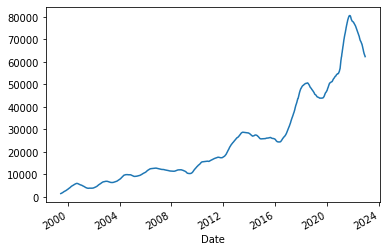

In [ ]:
se.rolling(200).mean().Close.dropna().plot()

In [ ]:
!pip install pyupbit -q

     |████████████████████████████████| 106 kB 10.4 MB/s 


In [ ]:
import pyupbit
# https://pyupbit.readthedocs.io/en/latest/
pyupbit.get_ohlcv()

,open,high,low,close,volume,value
2022-05-27 09:00:00,37662000.0,37889000.0,36413000.0,36837000.0,4373.885371,1.620369e+11
2022-05-28 09:00:00,36862000.0,37373000.0,36613000.0,37034000.0,1931.845973,7.136116e+10
2022-05-29 09:00:00,37033000.0,37620000.0,36825000.0,37380000.0,1712.650146,6.369122e+10
2022-05-30 09:00:00,37415000.0,39989000.0,37230000.0,39550000.0,5467.460037,2.112747e+11
2022-05-31 09:00:00,39527000.0,40600000.0,39300000.0,39923000.0,6442.979981,2.563085e+11
...,...,...,...,...,...,...
2022-12-08 09:00:00,22544000.0,23000000.0,22484000.0,22918000.0,2658.301222,6.023865e+10
2022-12-09 09:00:00,22918000.0,23000000.0,22770000.0,22849000.0,2349.726274,5.371503e+10
2022-12-10 09:00:00,22845000.0,22940000.0,22820000.0,22831000.0,1339.765766,3.064659e+10
2022-12-11 09:00:00,22824000.0,22915000.0,22760000.0,22775000.0,1591.849025,3.635057e+10
